In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [24]:
# create engine to hawaii.sqlite
path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)
conn = engine.connect()

In [25]:
#inspect the engine
inspector = inspect(engine)

#define our tables in our SQLite File
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [26]:
#show what our tables contain

for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # output it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [27]:
#query station table
query = """
        SELECT
            *
        FROM
            station;
    """
pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [28]:
#query measurement table
query = """
        SELECT
            *
        FROM
            measurement;
    """
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Precipitation Analysis

In [29]:
#query the highest date recorded in the measurment table
query = """
        SELECT
          max(date) as date
        FROM
            measurement
        """

pd.read_sql(query, conn)

,date
0,2017-08-23


In [30]:
#query the a years worth of date up to our highest date recorded in the measurment table
query = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
        ORDER BY
            date;
        """

df = pd.read_sql(query, conn)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2230 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [32]:
#change the data type of the date column
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


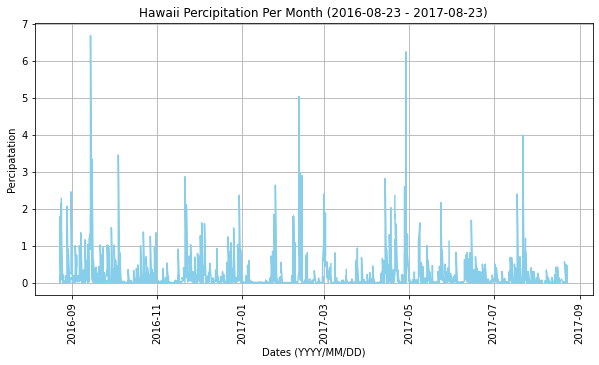

In [33]:
# Create a graph based the date and the percipitation recordings
plt.figure(figsize=(10,5))
plt.plot(df["date"], df["prcp"], color="skyblue")
plt.xlabel('Dates (YYYY/MM/DD)')
plt.ylabel('Percipatation')
plt.title("Hawaii Percipitation Per Month (2016-08-23 - 2017-08-23)")
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.grid(axis='y')
# Show the graph that we have created
plt.show()

In [34]:
#sum of for the precipitation data by date
query = """
        SELECT
            date,
            sum(prcp) as "sum prcp"
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
        GROUP BY
            date
        ORDER BY
            date;
        """

df_sum = pd.read_sql(query, conn)
df_sum["date"] = pd.to_datetime(df_sum["date"])
df_sum.head()

,date,sum prcp
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32


In [35]:
#average of for the precipitation data by date
query = """
        SELECT
            date,
            avg(prcp) as "avg prcp"
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
        GROUP BY
            date
        ORDER BY
            date;
        """

df_avg = pd.read_sql(query, conn)
df_avg["date"] = pd.to_datetime(df_avg["date"])
df_avg.head()

,date,avg prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


In [36]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [37]:
#Query the total number of Stations in our data
query = """
        SELECT
            count(station) as "Total Stations"
        FROM
            station;
    """
pd.read_sql(query, conn)

,Total Stations
0,9


In [38]:
#join our tables and count which station reported the most reading s in our data 
query = """
        SELECT
            s.station,
            s.name,
            count(m.id) as observations 
        FROM
            measurement m
            JOIN station s on m.station = s.station
        GROUP BY
            s.station,
            s.name
        ORDER BY
            observations desc;
        """

pd.read_sql(query, conn)

,station,name,observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [39]:
#Query the temps from the highest station
query = """
        SELECT
            station,
            date,
            tobs
        FROM
            measurement 
        WHERE
            station = "USC00519281"
        """

pd.read_sql(query, conn)

,station,date,tobs
0,USC00519281,2010-01-01,70.0
1,USC00519281,2010-01-02,62.0
2,USC00519281,2010-01-03,74.0
3,USC00519281,2010-01-04,75.0
4,USC00519281,2010-01-05,74.0
...,...,...,...
2767,USC00519281,2017-08-14,77.0
2768,USC00519281,2017-08-15,77.0
2769,USC00519281,2017-08-16,76.0
2770,USC00519281,2017-08-17,76.0


In [40]:
#Using the most active station id, calculate the lowest, highest, and average temperature.
query = """
        SELECT
            min(tobs) as min_temp,
            max(tobs) as max_temp,
            avg(tobs) as avg_temp
        FROM
            measurement 
        WHERE
            station = "USC00519281";
        """

pd.read_sql(query, conn)

,min_temp,max_temp,avg_temp
0,54.0,85.0,71.663781


In [41]:
#Pull the temps recoreded from the last 12 months in our most active station

query = """
        SELECT
            station,
            date,
            tobs
        FROM
            measurement 
        WHERE
            date >= "2016-08-23"
            AND station = "USC00519281";
        """

df2 = pd.read_sql(query, conn)
df2.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


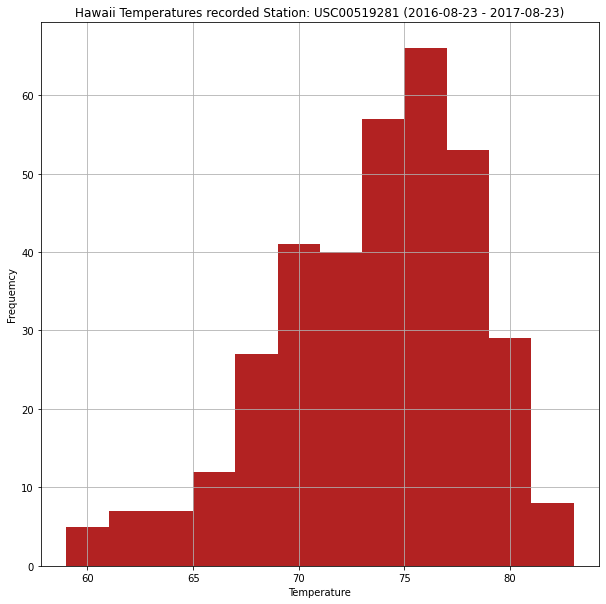

In [42]:
#Plot the Result
plt.figure(figsize=(10,10))
plt.hist(df2['tobs'], bins=12, color="firebrick")
plt.xlabel('Temperature')
plt.ylabel('Frequemcy')
plt.plot(figsize=(80,40))
plt.title("Hawaii Temperatures recorded Station: USC00519281 (2016-08-23 - 2017-08-23)")

plt.grid(axis='x')
plt.grid(axis='y')
plt.show()


In [43]:
conn.close()